In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import kagglehub
import pandas as pd
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Carga del dataset de boston

In [2]:
path = kagglehub.dataset_download("willianleite/boston-housing-dataset")

# Obtenemos la ruta al csv
csv_path = os.path.join(path, os.listdir(path)[0])

In [3]:
# Leemos el csv
boston_df = pd.read_csv(csv_path)
boston_df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Borramos la columna indice ya que no nos hace falta

In [4]:
boston_df.drop('Unnamed: 0', axis=1, inplace=True)
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Analisis del dataset y standarizacion

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas a escalar (todas menos 'medv')
columns_to_scale = boston_df.columns.difference(['medv'])

# Aplicar StandardScaler
scaler = StandardScaler()
boston_df[columns_to_scale] = scaler.fit_transform(boston_df[columns_to_scale])

boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


## Carga del dataset de students

In [8]:
path1 = kagglehub.dataset_download("lainguyn123/student-performance-factors")

# Obtenemos la ruta al csv
csv_path1 = os.path.join(path1, os.listdir(path1)[0])

In [9]:
students_df = pd.read_csv(csv_path1)
students_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Analizamos y codificamos el dataset

In [10]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [11]:
# Verificar valores nulos
print("\nValores nulos en students_df:")
print(students_df.isnull().sum())

# Verificar valores repetidos
print("Valores repetidos en students_df:", students_df.duplicated().sum())


Valores nulos en students_df:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Valores repetidos en students_df: 0


In [12]:
# Eliminar valores nulos en students_df
students_df.dropna(inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codificación
label_encoder = LabelEncoder()

# Lista de columnas categóricas a codificar
categorical_columns = ['Parental_Involvement', 'Extracurricular_Activities', 'Motivation_Level', 
                       'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 
                       'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 
                       'Distance_from_Home', 'Gender','Access_to_Resources']

# Aplicar LabelEncoder
for col in categorical_columns:
    students_df[col] = label_encoder.fit_transform(students_df[col])

# Estandarización de variables numéricas
scaler = StandardScaler()
numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores']

students_df[numeric_columns] = scaler.fit_transform(students_df[numeric_columns])
students_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.505079,0.344520,1,0,0,-0.023819,-0.143491,1,1,0,1,2,1,2,3,0,1,2,1,67
1,-0.163260,-1.387109,1,2,0,0.657418,-1.115763,1,1,2,2,2,1,0,4,0,0,1,0,61
2,0.672163,1.556661,2,2,1,-0.023819,1.106573,2,1,2,2,2,1,1,4,0,2,2,1,74
3,1.507587,0.777428,1,2,1,0.657418,1.592709,2,1,1,2,2,1,0,4,0,1,1,1,71
4,-0.163260,1.037172,2,2,1,-0.705056,-0.699075,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.839248,-0.954201,0,2,0,-0.023819,0.064853,2,1,1,0,2,1,2,2,0,1,2,0,68
6603,0.505079,-0.348131,0,2,0,0.657418,0.412093,2,1,3,1,0,1,2,2,0,1,2,0,69
6604,0.003825,0.864009,2,1,1,-0.705056,-0.699075,1,1,3,1,2,1,0,2,0,2,2,0,68
6605,-1.667022,0.517683,0,0,1,-0.705056,1.106573,0,1,2,1,2,0,2,3,0,1,0,0,68


## Metricas que vamos a utilizar

- MAE (Mean Absolute Error): La media de las diferencias absolutas entre las predicciones y los valores reales. Es fácil de interpretar.

- MSE (Mean Squared Error): Similar al MAE, pero penaliza más los errores grandes debido al cuadrado de la diferencia.

- R² (R-squared): Mide qué tan bien las características explican la variabilidad de la variable objetivo. Va de 0 a 1, donde 1 significa que el modelo explica todo.

- RMSE (Root Mean Squared Error): La raíz cuadrada del MSE, para llevar la métrica de nuevo a la escala de las características originales.

- Adjusted R² (Adjusted R²): Versión modificada de R² que penaliza los modelos con muchas variables. Es útil para comparar modelos con diferentes números de características.

## Algoritmo de Regresion de Ridge

La penalización L2 en la Regresión Ridge agrega el cuadrado de los coeficientes del modelo a la función de costo. Esto tiene el efecto de reducir los coeficientes grandes, lo que ayuda a prevenir el sobreajuste al modelo. A diferencia de la regresión lineal estándar, Ridge no elimina completamente las características, sino que las reduce, lo que lo hace útil cuando todas las variables tienen cierta relevancia.

Formula:

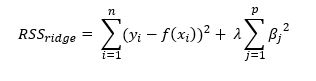

## Dataset de Boston
#### Sin hiperparametros

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dividir en características (X) y variable objetivo (y)
X = boston_df.drop(columns=['medv'])  # Características
y = boston_df['medv']  # Variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión
model = Ridge()  # Sin ajuste de hiperparámetros

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación inicial con las métricas básicas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Añadir dos métricas nuevas
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
n = len(y_test)  # Número de muestras
p = X_test.shape[1]  # Número de características
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")


Mean Absolute Error (MAE): 3.1859034992980253
Mean Squared Error (MSE): 24.31453746395633
R-squared (R²): 0.6684401592810276
Root Mean Squared Error (RMSE): 4.930977333547208
Adjusted R-squared (Adjusted R²): 0.6194597282657248


### Con hiperparametros

#### Explicación de los hiperparámetros:
- alpha: Es el coeficiente de regularización que controla el equilibrio entre ajuste del modelo y la penalización de los coeficientes. Si alpha es muy pequeño, se comporta como una regresión lineal sin regularización (más riesgo de sobreajuste). Si alpha es grande, el modelo se vuelve más simple (más regularizado), pero corre el riesgo de bajo ajuste (underfitting).

- solver: Este hiperparámetro determina el algoritmo que se usa para resolver la optimización en el modelo. Cada uno tiene características y rendimientos diferentes en función de los datos. Por ejemplo:

    - 'auto': El modelo selecciona automáticamente el mejor solver.
    - 'svd': Basado en la descomposición en valores singulares. Es útil cuando tienes muchas características.
    - 'cholesky': Utiliza la descomposición de Cholesky y es útil en sistemas de ecuaciones lineales bien condicionados.
    - 'lsqr': Utiliza la solución de mínimos cuadrados, y es adecuado para problemas de gran escala.
    - 'saga': Utiliza un enfoque basado en gradientes estocásticos.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir el modelo Ridge
model = Ridge()

# Definir los valores para cada hiperparámetro
param_grid = {
    'alpha': [0.1, 10],  # Dos valores diferentes para alpha
    'solver': ['svd', 'lsqr']  # Solvers diferentes al valor por defecto ('auto')
}

# Realizar la búsqueda de malla
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mejores parámetros encontrados: {best_params}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")


Mejores parámetros encontrados: {'alpha': 0.1, 'solver': 'svd'}
Mean Absolute Error (MAE): 3.1887416428939
Mean Squared Error (MSE): 24.293462505961102
R-squared (R²): 0.6687275433090569
Root Mean Squared Error (RMSE): 4.928839874246383
Adjusted R-squared (Adjusted R²): 0.6197895667524405


## Dataset de estudiantes

### Sin hiperparametros

In [16]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Definir las variables predictoras (X) y la variable objetivo (y)
X = students_df.drop(columns='Exam_Score')  # Eliminar la columna 'Exam_Score' de X
y = students_df['Exam_Score']  # 'Exam_Score' es la variable objetivo

# Dividir en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo Ridge sin hiperparámetros ajustados
ridge_model = Ridge()

# Ajustar el modelo a los datos de entrenamiento
ridge_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = ridge_model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Mostrar los resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")


Mean Absolute Error (MAE): 1.0642444221477567
Mean Squared Error (MSE): 5.215288638415037
R-squared (R²): 0.6643812621986457
Root Mean Squared Error (RMSE): 2.2837006455345756
Adjusted R-squared (Adjusted R²): 0.6593042271522875


### Con hiperaparametros
    - Mismo hiperparametros que anteriormente

In [17]:
# Definir el modelo Ridge
model = Ridge()

# Definir los valores para cada hiperparámetro
param_grid = {
    'alpha': [0.1, 10],  # Dos valores diferentes para alpha
    'solver': ['svd', 'lsqr']  # Solvers diferentes al valor por defecto ('auto')
}

# Realizar la búsqueda de malla
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mejores parámetros encontrados: {best_params}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mejores parámetros encontrados: {'alpha': 10, 'solver': 'lsqr'}
Mean Absolute Error (MAE): 1.0645533639212472
Mean Squared Error (MSE): 5.216274718130648
R-squared (R²): 0.6643178051490997
Root Mean Squared Error (RMSE): 2.283916530464861
Adjusted R-squared (Adjusted R²): 0.6592398101632979


## Algoritmo ElasticNet

ElasticNet es un algoritmo de regresión lineal que combina las penalizaciones L1 (Lasso) y L2 (Ridge). Esto significa que no solo reduce los coeficientes grandes (como Ridge), sino que también puede eliminar completamente algunos coeficientes (como Lasso), lo que lo hace útil para la selección de características y para manejar datos con alta multicolinealidad. La fórmula de ElasticNet incluye un término de regularización que es una combinación ponderada de las penalizaciones L1 y L2, controlada por el parámetro `l1_ratio`.

La fórmula de ElasticNet es:

$$
\text{Minimizar: } \frac{1}{2n_{\text{muestras}}} ||y - Xw||_2^2 + \alpha \rho ||w||_1 + \frac{\alpha (1 - \rho)}{2} ||w||_2^2
$$

Donde:
- $||y - Xw||_2^2$ es el error cuadrático medio.
- $||w||_1$ es la penalización L1 (Lasso).
- $||w||_2^2$ es la penalización L2 (Ridge).
- $\alpha$ controla la fuerza de la regularización.
- $\rho$ controla el equilibrio entre L1 y L2.

## Dataset de Boston

### Sin hiperparametros

In [18]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dividir en características (X) y variable objetivo (y)
X = boston_df.drop(columns=['medv'])  # Características
y = boston_df['medv']  # Variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo ElasticNet sin hiperparámetros ajustados
elastic_net_model = ElasticNet()

# Entrenar el modelo
elastic_net_model.fit(X_train, y_train)

# Predicciones
y_pred = elastic_net_model.predict(X_test)

# Evaluación con métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mean Absolute Error (MAE): 3.4249196690015795
Mean Squared Error (MSE): 28.324633943754236
R-squared (R²): 0.6137573608901279
Root Mean Squared Error (RMSE): 5.322089246128275
Adjusted R-squared (Adjusted R²): 0.5566987892034423


### Con hiperparámetros

#### Explicación de los hiperparámetros:
- **alpha**: Controla la fuerza de la regularización. Un valor más alto de `alpha` aumenta la penalización, lo que reduce el riesgo de sobreajuste, pero puede llevar a un ajuste insuficiente (underfitting). Un valor más bajo de `alpha` reduce la penalización, lo que puede mejorar el ajuste, pero aumenta el riesgo de sobreajuste.
  
- **l1_ratio**: Controla el equilibrio entre las penalizaciones L1 (Lasso) y L2 (Ridge). Un valor de `l1_ratio` cercano a 0 da más peso a L2 (Ridge), mientras que un valor cercano a 1 da más peso a L1 (Lasso). Este hiperparámetro es útil para manejar datos con alta multicolinealidad o para realizar selección de características.

A continuación, se realiza una búsqueda de los mejores hiperparámetros utilizando `GridSearchCV` y se comparan los resultados.

In [19]:
# Definir el modelo ElasticNet
elastic_net_model = ElasticNet()

# Definir los valores para cada hiperparámetro
param_grid = {
    'alpha': [0.1, 10.0],  # Valores diferentes al valor por defecto (1.0)
    'l1_ratio': [0.3, 0.7]  # Valores diferentes al valor por defecto (0.5)
}

# Realizar la búsqueda de malla
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mejores parámetros encontrados: {best_params}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mejores parámetros encontrados: {'alpha': 0.1, 'l1_ratio': 0.3}
Mean Absolute Error (MAE): 3.1762404503474477
Mean Squared Error (MSE): 25.081211099763596
R-squared (R²): 0.6579855829211643
Root Mean Squared Error (RMSE): 5.008114525424074
Adjusted R-squared (Adjusted R²): 0.6074607258526998


## Dataset de Students

### Modelo sin hiperparametros

In [20]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Definir las variables predictoras (X) y la variable objetivo (y)
X = students_df.drop(columns='Exam_Score')  # Eliminar la columna 'Exam_Score' de X
y = students_df['Exam_Score']  # 'Exam_Score' es la variable objetivo

# Dividir en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo Ridge sin hiperparámetros ajustados
ridge_model = Ridge()

# Ajustar el modelo a los datos de entrenamiento
ridge_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = ridge_model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Mostrar los resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mean Absolute Error (MAE): 1.0642444221477567
Mean Squared Error (MSE): 5.215288638415037
R-squared (R²): 0.6643812621986457
Root Mean Squared Error (RMSE): 2.2837006455345756
Adjusted R-squared (Adjusted R²): 0.6593042271522875


### Con hiperparametros
    - Mismos hiperparametros que anteriormente

In [21]:
# Definir el modelo ElasticNet
elastic_net_model = ElasticNet()

# Definir los valores para cada hiperparámetro
param_grid = {
    'alpha': [0.1, 10.0],  # Valores diferentes al valor por defecto (1.0)
    'l1_ratio': [0.3, 0.7]  # Valores diferentes al valor por defecto (0.5)
}

# Realizar la búsqueda de malla
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mejores parámetros encontrados: {best_params}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mejores parámetros encontrados: {'alpha': 0.1, 'l1_ratio': 0.3}
Mean Absolute Error (MAE): 1.1245468030987391
Mean Squared Error (MSE): 5.402893582528329
R-squared (R²): 0.6523083475597866
Root Mean Squared Error (RMSE): 2.3244125241721463
Adjusted R-squared (Adjusted R²): 0.6470486808429363


## Algoritmo Regresion Bayesiana

La regresión bayesiana es un enfoque probabilístico para la regresión que incorpora la incertidumbre en los parámetros del modelo. En lugar de estimar un único valor para los coeficientes, este método utiliza distribuciones de probabilidad para modelar la incertidumbre en los parámetros. Esto permite obtener predicciones con intervalos de confianza, lo que es útil en situaciones donde la incertidumbre es importante.

La fórmula general de la regresión bayesiana es:

$$
p(w|X, y) = \frac{p(y|X, w) \cdot p(w)}{p(y|X)}
$$

Donde:
- $p(w|X, y)$ es la distribución posterior de los parámetros $w$ dados los datos $X$ y $y$.
- $p(y|X, w)$ es la verosimilitud, que mide qué tan bien los datos observados $y$ se ajustan al modelo dado $X$ y $w$.
- $p(w)$ es la distribución previa de los parámetros $w$, que representa el conocimiento previo sobre los parámetros antes de observar los datos.
- $p(y|X)$ es la evidencia, que actúa como un factor de normalización.

## Dataset boston

### Sin hiperparametros

In [22]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dividir en características (X) y variable objetivo (y)
X = boston_df.drop(columns=['medv'])  # Características
y = boston_df['medv']  # Variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión bayesiana
bayesian_model = BayesianRidge()

# Entrenar el modelo
bayesian_model.fit(X_train, y_train)

# Predicciones
y_pred = bayesian_model.predict(X_test)

# Evaluación con métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mean Absolute Error (MAE): 3.177398834288224
Mean Squared Error (MSE): 24.426939737800666
R-squared (R²): 0.6669074104032207
Root Mean Squared Error (RMSE): 4.942361757075322
Adjusted R-squared (Adjusted R²): 0.6177005505764237


### Con hiperparámetros

#### Explicación de los hiperparámetros:
- **max_iter**: Este hiperparámetro controla el número máximo de iteraciones que el modelo realizará durante el ajuste. Un valor más alto puede ser útil cuando el modelo no converge con un número menor de iteraciones, pero puede aumentar el tiempo de entrenamiento. Se recomienda usar valores más altos si los datos son complejos o si el modelo no converge fácilmente.

- **alpha_1**: Es el parámetro de regularización para la distribución previa de la varianza de los coeficientes. Un valor más alto implica una mayor regularización, lo que puede ser útil para evitar el sobreajuste en modelos con muchas características. Se recomienda ajustar este parámetro si se observa sobreajuste o subajuste en el modelo.

A continuación, se realiza una búsqueda de los mejores hiperparámetros utilizando `GridSearchCV` y se comparan los resultados.


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir el modelo BayesianRidge
bayesian_model = BayesianRidge()

# Definir los valores para cada hiperparámetro
param_grid = {
    'max_iter': [400, 500],  # Valores diferentes al valor por defecto (300)
    'alpha_1': [1e-2, 1e-4]  # Valores diferentes al valor por defecto (1e-6)
}

# Realizar la búsqueda de malla
grid_search = GridSearchCV(estimator=bayesian_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mejores parámetros encontrados: {best_params}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mejores parámetros encontrados: {'alpha_1': 0.01, 'max_iter': 400}
Mean Absolute Error (MAE): 3.1773992654420344
Mean Squared Error (MSE): 24.42693284466976
R-squared (R²): 0.6669075043998837
Root Mean Squared Error (RMSE): 4.942361059723354
Adjusted R-squared (Adjusted R²): 0.6177006584589574


## Dataset de students

### Sin hiperparametros

In [27]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir las variables predictoras (X) y la variable objetivo (y)
X = students_df.drop(columns='Exam_Score')  # Eliminar la columna 'Exam_Score' de X
y = students_df['Exam_Score']  # 'Exam_Score' es la variable objetivo

# Dividir en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión bayesiana
bayesian_model = BayesianRidge()

# Entrenar el modelo
bayesian_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = bayesian_model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Mostrar los resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mean Absolute Error (MAE): 1.0645070530936234
Mean Squared Error (MSE): 5.216092365578965
R-squared (R²): 0.6643295400572656
Root Mean Squared Error (RMSE): 2.2838766090966836
Adjusted R-squared (Adjusted R²): 0.659251722589979


### Con hiperparametros
    - mismos hiperparametros

In [28]:
# Definir el modelo BayesianRidge
bayesian_model = BayesianRidge()

# Definir los valores para cada hiperparámetro
param_grid = {
    'max_iter': [400, 500],  # Valores diferentes al valor por defecto (300)
    'alpha_1': [1e-2, 1e-4]  # Valores diferentes al valor por defecto (1e-6)
}

# Realizar la búsqueda de malla
grid_search = GridSearchCV(estimator=bayesian_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mejores parámetros encontrados: {best_params}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mejores parámetros encontrados: {'alpha_1': 0.0001, 'max_iter': 400}
Mean Absolute Error (MAE): 1.064507053081467
Mean Squared Error (MSE): 5.216092365540761
R-squared (R²): 0.6643295400597241
Root Mean Squared Error (RMSE): 2.2838766090883196
Adjusted R-squared (Adjusted R²): 0.6592517225924748


## Algoritmo de Lasso

El algoritmo de Lasso (Least Absolute Shrinkage and Selection Operator) es un método de regresión lineal que utiliza una penalización L1 para reducir los coeficientes de las características menos importantes a cero. Esto lo hace útil para la selección de características, ya que elimina automáticamente aquellas que no contribuyen significativamente al modelo. Es especialmente útil cuando se trabaja con datos de alta dimensionalidad o con multicolinealidad.

### Fórmula:

$$
\text{Minimizar: } \frac{1}{2n_{\text{muestras}}} ||y - Xw||_2^2 + \alpha ||w||_1
$$

Donde:
- $||y - Xw||_2^2$ es el error cuadrático medio.
- $||w||_1$ es la penalización L1.
- $\alpha$ es el parámetro de regularización que controla la fuerza de la penalización. Un valor más alto de $\alpha$ aumenta la regularización, lo que puede llevar a un modelo más simple pero con mayor riesgo de subajuste (underfitting). Un valor más bajo de $\alpha$ reduce la regularización, lo que puede llevar a un modelo más complejo pero con mayor riesgo de sobreajuste (overfitting).



## Dataset Boston

### Sin hiperparametros

In [29]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dividir en características (X) y variable objetivo (y)
X = boston_df.drop(columns=['medv'])  # Características
y = boston_df['medv']  # Variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Lasso sin hiperparámetros ajustados
lasso_model = Lasso()

# Entrenar el modelo
lasso_model.fit(X_train, y_train)

# Predicciones
y_pred = lasso_model.predict(X_test)

# Evaluación con métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mean Absolute Error (MAE): 3.464849520571196
Mean Squared Error (MSE): 27.552382057778367
R-squared (R²): 0.6242880038311522
Root Mean Squared Error (RMSE): 5.249036298005413
Adjusted R-squared (Adjusted R²): 0.5687850953062088


## Con hiperparametros

#### Explicación de los hiperparámetros:
- **alpha**: Controla la fuerza de la regularización. Un valor más alto de `alpha` aumenta la penalización, lo que puede llevar a un modelo más simple pero con mayor riesgo de subajuste (underfitting). Un valor más bajo de `alpha` reduce la penalización, lo que puede llevar a un modelo más complejo pero con mayor riesgo de sobreajuste (overfitting).

- **max_iter**: Especifica el número máximo de iteraciones para que el modelo converja. Si el modelo no converge con el valor predeterminado, se puede aumentar este parámetro para garantizar que el algoritmo tenga suficiente tiempo para encontrar una solución óptima.

In [30]:
# Definir el modelo Lasso
lasso_model = Lasso()

# Definir los valores para cada hiperparámetro
param_grid = {
    'alpha': [0.01, 0.1],  # Valores diferentes al valor por defecto (1.0)
    'max_iter': [500, 2000]  # Valores diferentes al valor por defecto (1000)
}

# Realizar la búsqueda de malla
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mejores parámetros encontrados: {best_params}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mejores parámetros encontrados: {'alpha': 0.01, 'max_iter': 500}
Mean Absolute Error (MAE): 3.181469473463911
Mean Squared Error (MSE): 24.33531484236599
R-squared (R²): 0.6681568331315472
Root Mean Squared Error (RMSE): 4.933083705185428
Adjusted R-squared (Adjusted R²): 0.6191345471168894


## Dataset de students

### Modelo sin hiperparametros

In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Definir las variables predictoras (X) y la variable objetivo (y)
X = students_df.drop(columns='Exam_Score')  # Eliminar la columna 'Exam_Score' de X
y = students_df['Exam_Score']  # 'Exam_Score' es la variable objetivo

# Dividir en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Lasso sin hiperparámetros ajustados
lasso_model = Lasso()

# Entrenar el modelo
lasso_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = lasso_model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Mostrar los resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mean Absolute Error (MAE): 1.9747184294257207
Mean Squared Error (MSE): 9.147648207304393
R-squared (R²): 0.4113226787541038
Root Mean Squared Error (RMSE): 3.024507928127217
Adjusted R-squared (Adjusted R²): 0.40241752819385535


## Con hiperparametros
    - Mismos hiperparametros

In [32]:
# Definir el modelo Lasso
lasso_model = Lasso()

# Definir los valores para cada hiperparámetro
param_grid = {
    'alpha': [0.01, 0.1],  # Valores diferentes al valor por defecto (1.0)
    'max_iter': [1500, 3000]  # Valores diferentes al valor por defecto (1000)
}

# Realizar la búsqueda de malla
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mejores parámetros encontrados: {best_params}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mejores parámetros encontrados: {'alpha': 0.01, 'max_iter': 1500}
Mean Absolute Error (MAE): 1.0659429520987653
Mean Squared Error (MSE): 5.2218301262942015
R-squared (R²): 0.6639602987472316
Root Mean Squared Error (RMSE): 2.2851324089194924
Adjusted R-squared (Adjusted R²): 0.658876895623185


## Algoritmo de Quantile Regression

La regresión cuantílica es una técnica estadística que permite modelar la relación entre las variables independientes y un percentil específico de la variable dependiente. A diferencia de la regresión lineal ordinaria, que estima la media condicional de la variable dependiente, la regresión cuantílica se centra en estimar cuantiles específicos (por ejemplo, el percentil 25, la mediana o el percentil 75). Esto la hace útil para analizar la distribución completa de la variable dependiente y no solo su promedio.

### Fórmula:

$$
\underset{\beta}{\text{minimizar}} \sum_{i \in \{y_i \geq x_i^\top \beta\}} \tau |y_i - x_i^\top \beta| + \sum_{i \in \{y_i < x_i^\top \beta\}} (1 - \tau) |y_i - x_i^\top \beta|
$$

Donde:
- $y_i$ es la variable dependiente.
- $x_i$ son las variables independientes.
- $\beta$ son los coeficientes del modelo.
- $\tau$ es el cuantíl que se desea estimar (por ejemplo, $\tau = 0.5$ para la mediana).



## Dataset de boston

### Sin hiperparametros

In [33]:
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dividir en características (X) y variable objetivo (y)
X = boston_df.drop(columns=['medv'])  # Características
y = boston_df['medv']  # Variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Quantile Regression sin hiperparámetros ajustados
quantile_model = QuantileRegressor(quantile=0.5)  # Mediana (quantile=0.5)

# Entrenar el modelo
quantile_model.fit(X_train, y_train)

# Predicciones
y_pred = quantile_model.predict(X_test)

# Evaluación con métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mean Absolute Error (MAE): 5.958823529411766
Mean Squared Error (MSE): 73.34627450980392
R-squared (R²): -0.0001703355389923722
Root Mean Squared Error (RMSE): 8.564243954360707
Adjusted R-squared (Adjusted R²): -0.14792277147088906


## Con hiperparametros

#### Explicación de los hiperparámetros:
- **quantile**: Este hiperparámetro define el cuantíl que se desea estimar. Por ejemplo, un valor de `0.5` corresponde a la mediana, mientras que valores como `0.25` o `0.75` estiman el percentil 25 o 75, respectivamente. Esto permite modelar diferentes partes de la distribución de la variable dependiente.

- **alpha**: Controla la fuerza de la regularización L1 aplicada al modelo. Un valor más alto de `alpha` aumenta la penalización, lo que puede llevar a un modelo más simple pero con mayor riesgo de subajuste (underfitting). Un valor más bajo de `alpha` reduce la penalización, lo que puede llevar a un modelo más complejo pero con mayor riesgo de sobreajuste (overfitting).

In [34]:
# Definir el modelo QuantileRegressor
quantile_model = QuantileRegressor()

# Definir los valores para cada hiperparámetro
param_grid = {
    'quantile': [0.25, 0.75],  # Cuantiles diferentes al valor por defecto (0.5)
    'alpha': [0.1, 1.0]        # Valores diferentes al valor por defecto (0.0001)
}

# Realizar la búsqueda de malla
grid_search = GridSearchCV(estimator=quantile_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mejores parámetros encontrados: {best_params}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mejores parámetros encontrados: {'alpha': 0.1, 'quantile': 0.75}
Mean Absolute Error (MAE): 4.709258025542885
Mean Squared Error (MSE): 41.21255611056527
R-squared (R²): 0.4380140457166103
Root Mean Squared Error (RMSE): 6.4197006246837764
Adjusted R-squared (Adjusted R²): 0.35499339337929137


## Dataset de estudiantes

### Sin hiperparametros

In [37]:
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir las variables predictoras (X) y la variable objetivo (y)
X = students_df.drop(columns='Exam_Score')  # Eliminar la columna 'Exam_Score' de X
y = students_df['Exam_Score']  # 'Exam_Score' es la variable objetivo

# Dividir en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Quantile Regression sin hiperparámetros ajustados
quantile_model = QuantileRegressor(quantile=0.5)  # Mediana (quantile=0.5)

# Entrenar el modelo
quantile_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = quantile_model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Mostrar los resultados
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mean Absolute Error (MAE): 2.8981191222570533
Mean Squared Error (MSE): 15.612852664576803
R-squared (R²): -0.0047317163170934595
Root Mean Squared Error (RMSE): 3.9513102465608547
Adjusted R-squared (Adjusted R²): -0.019930683363291513


## Con hiperparametros
    - Mismos que anteriormente

In [36]:
# Definir el modelo QuantileRegressor
quantile_model = QuantileRegressor()

# Definir los valores para cada hiperparámetro
param_grid = {
    'quantile': [0.25, 0.75],  # Cuantiles diferentes al valor por defecto (0.5)
    'alpha': [0.01, 0.1]       # Valores diferentes al valor por defecto (0.0001)
}

# Realizar la búsqueda de malla
grid_search = GridSearchCV(estimator=quantile_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo y los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # R² ajustado

# Resultados
print(f"Mejores parámetros encontrados: {best_params}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mejores parámetros encontrados: {'alpha': 0.01, 'quantile': 0.75}
Mean Absolute Error (MAE): 1.265855874847221
Mean Squared Error (MSE): 5.720996497599566
R-squared (R²): 0.6318375153107808
Root Mean Squared Error (RMSE): 2.3918604678366098
Adjusted R-squared (Adjusted R²): 0.6262681783608643


## Analisis de resultados

### Dataset de Boston
#### Algoritmo: Regresión Bayesiana con Hiperparámetros
- **Mejores parámetros encontrados**: `{'alpha_1': 0.01, 'max_iter': 400}`
- **Resultados**:
    - Mean Absolute Error (MAE): 3.1774
    - Mean Squared Error (MSE): 24.4269
    - R-squared (R²): 0.6669
    - Root Mean Squared Error (RMSE): 4.9424
    - Adjusted R-squared (Adjusted R²): 0.6177

**Conclusión**:  
El dataset de Boston presenta una dificultad moderada debido a la naturaleza de las variables y su relación con la variable objetivo (`medv`). Los resultados obtenidos con la regresión bayesiana son razonables, con un R² ajustado de 0.6177, lo que indica que el modelo explica una buena parte de la variabilidad de los datos, aunque aún hay margen de mejora. La complejidad de las relaciones entre las variables puede requerir modelos más avanzados o ajustes adicionales para mejorar el rendimiento.

---

### Dataset de Students
#### Algoritmo: Ridge con Hiperparámetros
- **Mejores parámetros encontrados**: `{'alpha': 10, 'solver': 'lsqr'}`
- **Resultados**:
    - Mean Absolute Error (MAE): 1.0646
    - Mean Squared Error (MSE): 5.2163
    - R-squared (R²): 0.6643
    - Root Mean Squared Error (RMSE): 2.2839
    - Adjusted R-squared (Adjusted R²): 0.6592

**Conclusión**:  
El dataset de Students es más estructurado y presenta relaciones más claras entre las variables predictoras y la variable objetivo (`Exam_Score`). Esto se refleja en un R² ajustado de 0.6592, lo que indica un buen ajuste del modelo Ridge. La baja MAE sugiere que el modelo tiene un error promedio pequeño, lo que lo hace adecuado para este conjunto de datos. Sin embargo, la complejidad de las variables categóricas y su codificación puede influir en el rendimiento del modelo.

---

### Comparación General
- Ambos datasets presentan un nivel de dificultad intermedia, pero el dataset de Boston parece ser más desafiante debido a la naturaleza de sus variables y la posible multicolinealidad.
- El dataset de Students tiene un mejor rendimiento relativo, probablemente debido a la estructura más clara de las variables y la relación con la variable objetivo.
- En ambos casos, los modelos seleccionados (Regresión Bayesiana y Ridge) han mostrado ser efectivos, aunque podrían beneficiarse de ajustes adicionales o el uso de modelos más complejos para mejorar el rendimiento.